In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pmdarima import auto_arima
import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols 
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults 
import pmdarima as pm

In [3]:
wf = pd.concat(map(pd.read_csv, ['C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Wind_Forecast/Generation Forecasts for Wind and Solar_201901010000-202001010000.csv',
                                 'C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Wind_Forecast/Generation Forecasts for Wind and Solar_202001010000-202101010000.csv']))

In [4]:
wf

,MTU (CET),Generation - Solar [MW] Day Ahead/ BZN|IE(SEM),Generation - Solar [MW] Intraday / BZN|IE(SEM),Generation - Solar [MW] Current / BZN|IE(SEM),Generation - Wind Offshore [MW] Day Ahead/ BZN|IE(SEM),Generation - Wind Offshore [MW] Intraday / BZN|IE(SEM),Generation - Wind Offshore [MW] Current / BZN|IE(SEM),Generation - Wind Onshore [MW] Day Ahead/ BZN|IE(SEM),Generation - Wind Onshore [MW] Intraday / BZN|IE(SEM),Generation - Wind Onshore [MW] Current / BZN|IE(SEM)
0,01.01.2019 00:00 - 01.01.2019 01:00,n/e,n/e,n/e,n/e,n/e,n/e,761,n/e,n/e
1,01.01.2019 01:00 - 01.01.2019 02:00,n/e,n/e,n/e,n/e,n/e,n/e,639,n/e,n/e
2,01.01.2019 02:00 - 01.01.2019 03:00,n/e,n/e,n/e,n/e,n/e,n/e,558,n/e,n/e
3,01.01.2019 03:00 - 01.01.2019 04:00,n/e,n/e,n/e,n/e,n/e,n/e,481,n/e,n/e
4,01.01.2019 04:00 - 01.01.2019 05:00,n/e,n/e,n/e,n/e,n/e,n/e,376,n/e,n/e
...,...,...,...,...,...,...,...,...,...,...
8780,31.12.2020 19:00 - 31.12.2020 20:00,-,-,n/e,-,-,n/e,-,-,n/e
8781,31.12.2020 20:00 - 31.12.2020 21:00,-,-,n/e,-,-,n/e,-,-,n/e
8782,31.12.2020 21:00 - 31.12.2020 22:00,-,-,n/e,-,-,n/e,-,-,n/e
8783,31.12.2020 22:00 - 31.12.2020 23:00,-,-,n/e,-,-,n/e,-,-,n/e


In [5]:
wf_df = pd.DataFrame(data = wf)

In [17]:
wf_df = wf_df.iloc[:15457]

In [18]:
wf_df.rename(columns={'MTU (CET)':'MTU'},inplace=True)
wf_df[['Start_date','End_date']] = wf_df.MTU.str.split("-",expand=True,)
wf_df['Start_date'] = pd.to_datetime(wf_df['Start_date'], utc=True, infer_datetime_format=True, dayfirst= True)
wf_df = wf_df.set_index('Start_date')
wf_df.drop(columns={'MTU','End_date'})
wf_df = wf_df.apply(pd.to_numeric, errors='coerce')

In [19]:
wf_df.describe()

,MTU,Generation - Solar [MW] Day Ahead/ BZN|IE(SEM),Generation - Solar [MW] Intraday / BZN|IE(SEM),Generation - Solar [MW] Current / BZN|IE(SEM),Generation - Wind Offshore [MW] Day Ahead/ BZN|IE(SEM),Generation - Wind Offshore [MW] Intraday / BZN|IE(SEM),Generation - Wind Offshore [MW] Current / BZN|IE(SEM),Generation - Wind Onshore [MW] Day Ahead/ BZN|IE(SEM),Generation - Wind Onshore [MW] Intraday / BZN|IE(SEM),Generation - Wind Onshore [MW] Current / BZN|IE(SEM),End_date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15455.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1441.562989,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1112.605045,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1135.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2181.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4698.000000,NaN,NaN,NaN


In [77]:
wf_df.isnull().sum()

MTU                                                        17546
Generation - Solar  [MW] Day Ahead/ BZN|IE(SEM)            17546
Generation - Solar  [MW] Intraday / BZN|IE(SEM)            17546
Generation - Solar  [MW] Current / BZN|IE(SEM)             17546
Generation - Wind Offshore  [MW] Day Ahead/ BZN|IE(SEM)    17546
Generation - Wind Offshore  [MW] Intraday / BZN|IE(SEM)    17546
Generation - Wind Offshore  [MW] Current / BZN|IE(SEM)     17546
Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)       961
Generation - Wind Onshore  [MW] Intraday / BZN|IE(SEM)     17546
Generation - Wind Onshore  [MW] Current / BZN|IE(SEM)      17546
End_date                                                   17546
dtype: int64

In [20]:
# delete total null columns
wf_df.dropna(how='all', axis=1,inplace=True)

In [22]:
wf_df

,Generation - Wind Onshore [MW] Day Ahead/ BZN|IE(SEM)
Start_date,
2019-01-01 00:00:00+00:00,761.0
2019-01-01 01:00:00+00:00,639.0
2019-01-01 02:00:00+00:00,558.0
2019-01-01 03:00:00+00:00,481.0
2019-01-01 04:00:00+00:00,376.0
...,...
2020-10-05 19:00:00+00:00,1563.0
2020-10-05 20:00:00+00:00,1569.0
2020-10-05 21:00:00+00:00,1553.0


In [21]:
wf_df.isnull().sum()

Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)    2
dtype: int64

In [23]:
wf_df = wf_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [24]:
wf_df.isnull().sum()

Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)    0
dtype: int64

In [25]:
wf_df.rename(columns={'Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)':'Wind_Onshore_Day_Ahead'}, inplace= True)

In [26]:
# resampling data to collect daily data;
wf_df_new = wf_df.resample('D').mean().round(2)
wf_df_new

,Wind_Onshore_Day_Ahead
Start_date,
2019-01-01 00:00:00+00:00,244.62
2019-01-02 00:00:00+00:00,498.58
2019-01-03 00:00:00+00:00,764.29
2019-01-04 00:00:00+00:00,1133.38
2019-01-05 00:00:00+00:00,1362.71
...,...
2020-10-01 00:00:00+00:00,483.17
2020-10-02 00:00:00+00:00,1903.96
2020-10-03 00:00:00+00:00,869.38


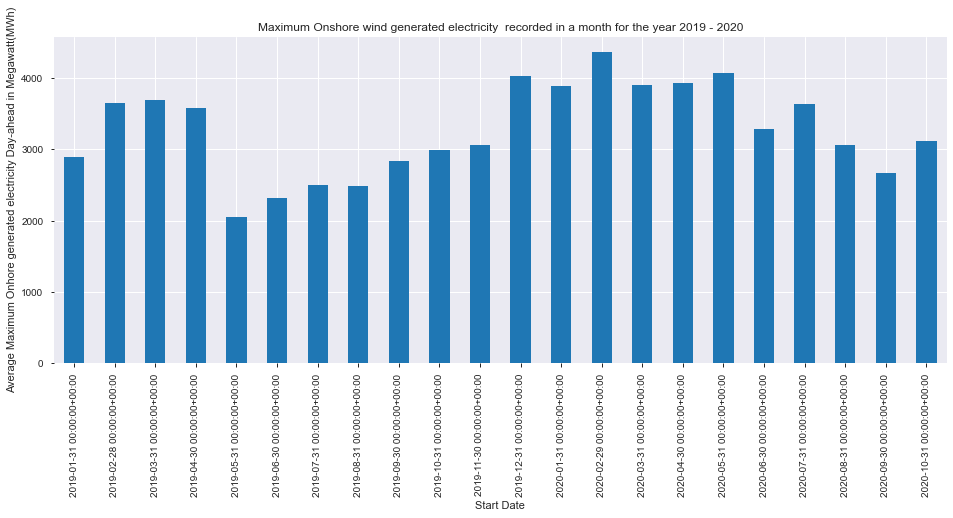

In [28]:
title = 'Maximum Onshore wind generated electricity  recorded in a month for the year 2019 - 2020'
wf_df_new['Wind_Onshore_Day_Ahead'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4',
                                                                xlabel='Start Date', ylabel= 'Average Maximum Onhore generated electricity Day-ahead in Megawatt(MWh)');

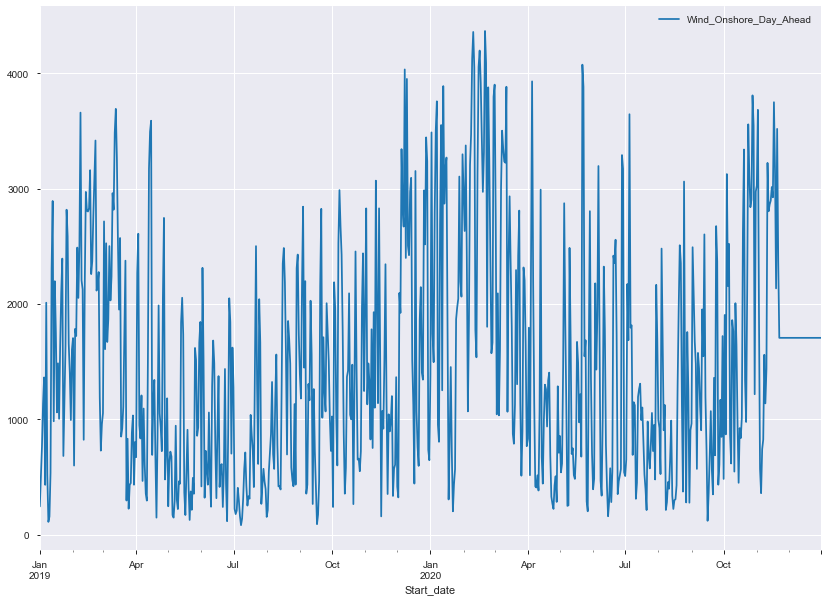

In [91]:
wf_df_new.plot(figsize=(14,10));

In [31]:
wf_df_new['2-Day_mean Day_Ahead_Wind_Onshore']=wf_df_new['Wind_Onshore_Day_Ahead'].rolling(window=2).mean().round(2)
wf_df_new['7-Day_mean Day_Ahead_Wind_Onshore'] = wf_df_new['Wind_Onshore_Day_Ahead'].rolling(window=7).mean().round(2)
wf_df_new['14-Day_mean Day_Ahead_Wind_Onshore'] = wf_df_new['Wind_Onshore_Day_Ahead'].rolling(window=14).mean().round(2)

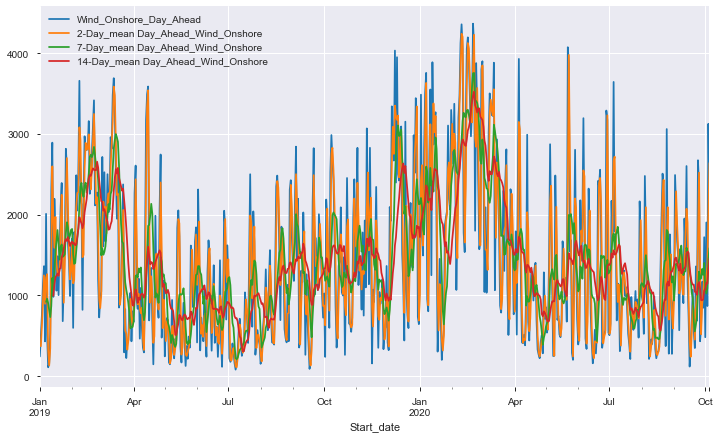

In [32]:
wf_df_new.plot(figsize=(12,7));

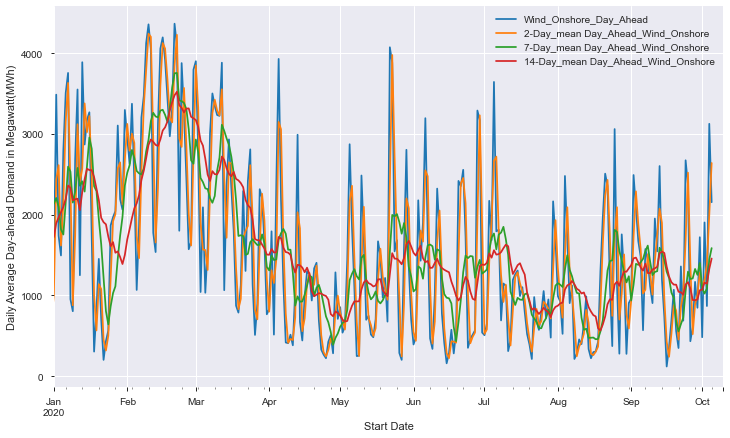

In [33]:
wf_df_new.plot(figsize=(12,7),xlim=['2020-01-01','2020-10-10'],
                  xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [34]:
result = seasonal_decompose(wf_df_new['Wind_Onshore_Day_Ahead'])

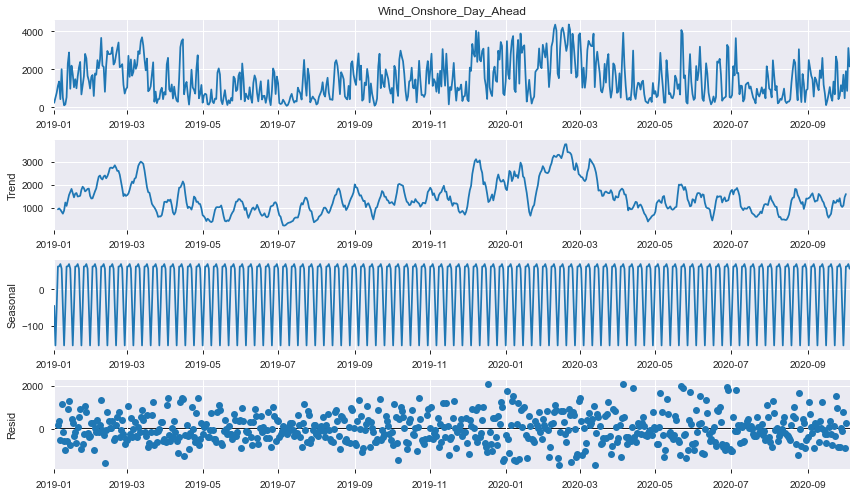

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] =12,7
result.plot();

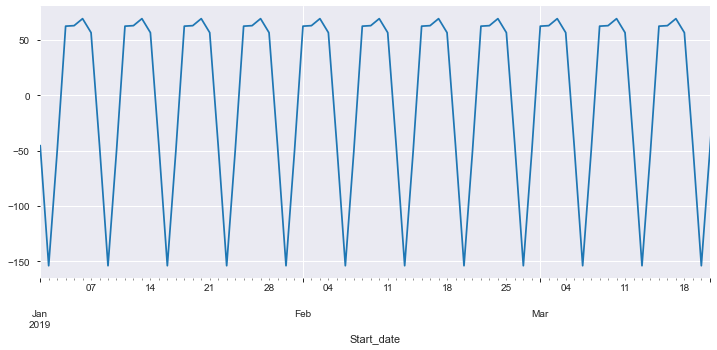

In [101]:
result.seasonal.plot(figsize = (12,5), xlim=['2019-01-01','2019-03-21']);

In [39]:
train_wf = pd.DataFrame(wf_df_new['Wind_Onshore_Day_Ahead'].loc['2019-04-01':'2020-09-30'])
test_wf = pd.DataFrame(wf_df_new['Wind_Onshore_Day_Ahead'].loc['2020-10-01':'2020-10-05'])

In [40]:
test_wf

,Wind_Onshore_Day_Ahead
Start_date,
2020-10-01 00:00:00+00:00,483.17
2020-10-02 00:00:00+00:00,1903.96
2020-10-03 00:00:00+00:00,869.38
2020-10-04 00:00:00+00:00,3125.42
2020-10-05 00:00:00+00:00,2155.17


In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [42]:
fitted_model = ExponentialSmoothing(train_wf['Wind_Onshore_Day_Ahead'], seasonal='add',
                                    seasonal_periods=7).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [43]:
test_prediction=fitted_model.forecast(5)

In [44]:
test_prediction

2020-10-01 00:00:00+00:00    1224.227591
2020-10-02 00:00:00+00:00    1300.547460
2020-10-03 00:00:00+00:00    1337.618708
2020-10-04 00:00:00+00:00    1316.226938
2020-10-05 00:00:00+00:00    1351.436785
Freq: D, dtype: float64

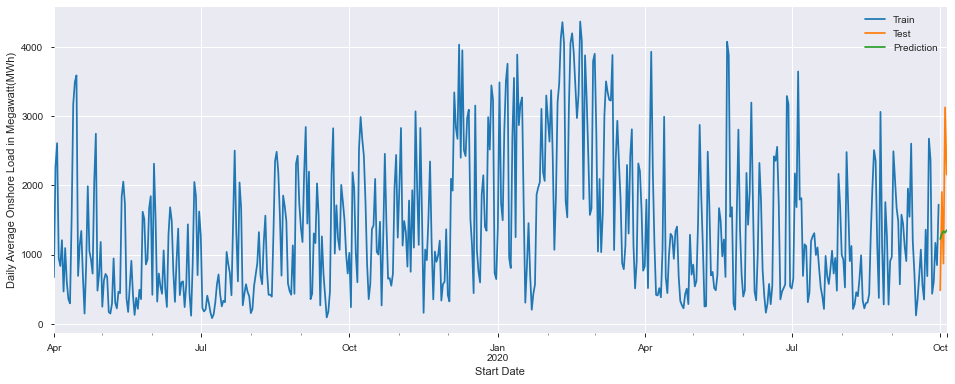

In [45]:
train_wf['Wind_Onshore_Day_Ahead'].plot(legend = True, label = 'Train', figsize=(16,6))
test_wf['Wind_Onshore_Day_Ahead'].plot(legend = True, label = 'Test')
test_prediction.plot(legend = True, label = 'Prediction',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

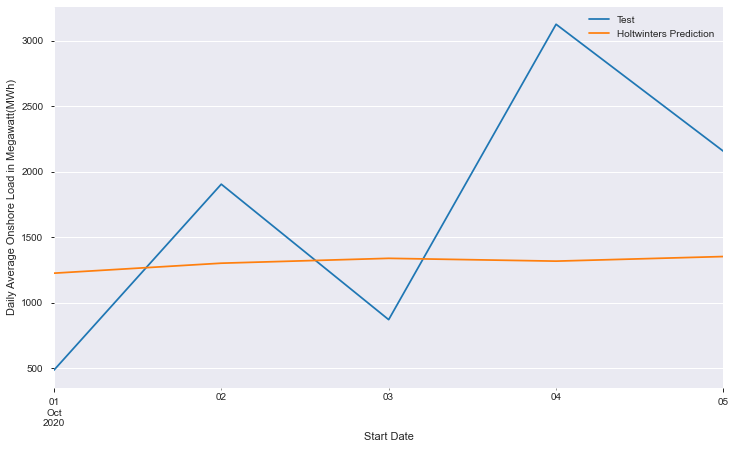

In [104]:
test_wf['Wind_Onshore_Day_Ahead'].plot(legend = True, label = 'Test')
test_prediction.plot(legend = True, label = 'Holtwinters Prediction',xlim=['2020-10-01','2020-10-5'],xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [48]:
test_wf['Wind_Onshore_Day_Ahead'].describe()

count       5.0000
mean     1707.4200
std      1054.8615
min       483.1700
25%       869.3800
50%      1903.9600
75%      2155.1700
max      3125.4200
Name: Wind_Onshore_Day_Ahead, dtype: float64

In [51]:
print(mean_absolute_error(test_wf['Wind_Onshore_Day_Ahead'],test_prediction).round(2))
print(mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],test_prediction).round(2))
print(np.sqrt(mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],test_prediction)).round(2))

885.13
1010337.43
1005.16


# Forecast with Holtwinters

In [95]:
forecast_model = ExponentialSmoothing(wf_df_new['Wind_Onshore_Day_Ahead'], seasonal='add',
                                    seasonal_periods=7).fit()

In [96]:
forecast_prediction=forecast_model.forecast(5)

In [97]:
forecast_prediction

2020-10-06 00:00:00+00:00    1846.086223
2020-10-07 00:00:00+00:00    1736.976437
2020-10-08 00:00:00+00:00    1850.850894
2020-10-09 00:00:00+00:00    1955.407995
2020-10-10 00:00:00+00:00    1951.628054
Freq: D, dtype: float64

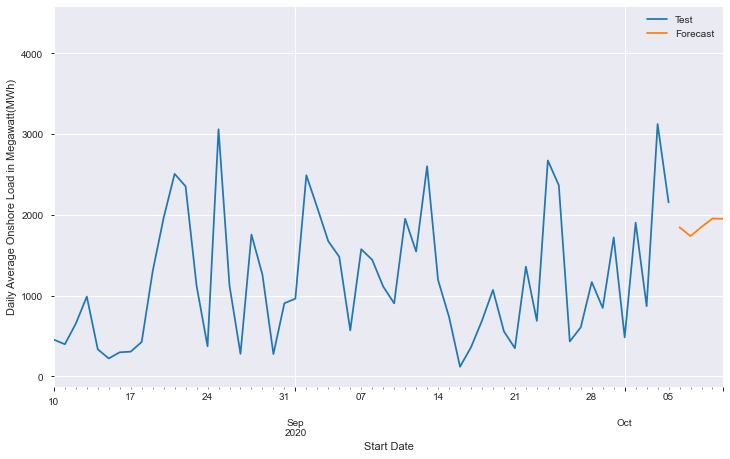

In [99]:
wf_df_new['Wind_Onshore_Day_Ahead'].plot(legend = True, label = 'Test')
forecast_prediction.plot(legend = True, label = 'Forecast', xlim=['2020-08-10','2020-10-10'],
                         xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

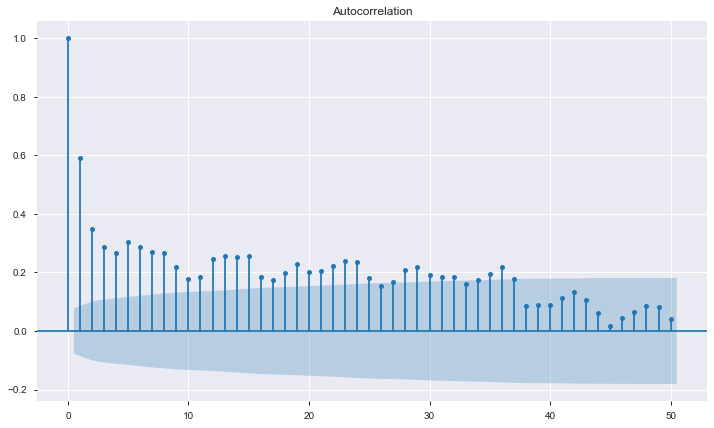

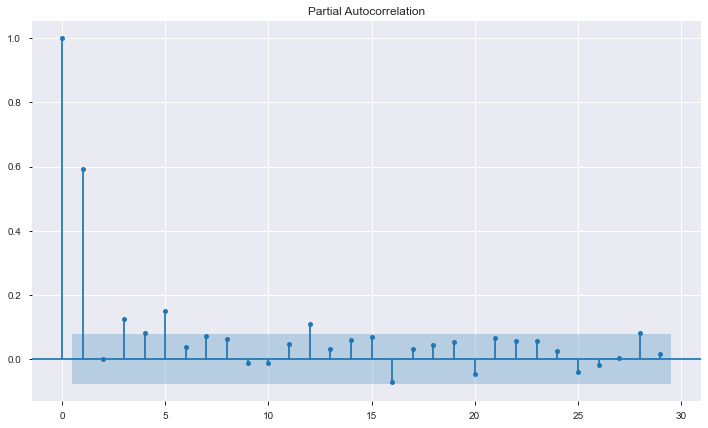

In [53]:
plot_acf(wf_df_new['Wind_Onshore_Day_Ahead'],lags=50);
plot_pacf(wf_df_new['Wind_Onshore_Day_Ahead']);

In [54]:
from statsmodels.tsa.ar_model import AR, ARResults

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
train_wf_ar = train_wf['Wind_Onshore_Day_Ahead']
train_wf_ar=pd.DataFrame(data=train_wf_ar)

In [57]:
test_wf_ar = test_wf['Wind_Onshore_Day_Ahead']
test_wf_ar=pd.DataFrame(data=test_wf_ar)

In [58]:
pred_start_date= test_wf_ar.index[0]
pred_end_date = test_wf_ar.index[-1]

In [59]:
arima_1_model = AR(train_wf_ar['Wind_Onshore_Day_Ahead'])
arima_1_model_fit = arima_1_model.fit(maxlag=1)
prediction_AR1= arima_1_model_fit.predict(start=pred_start_date, end =pred_end_date)

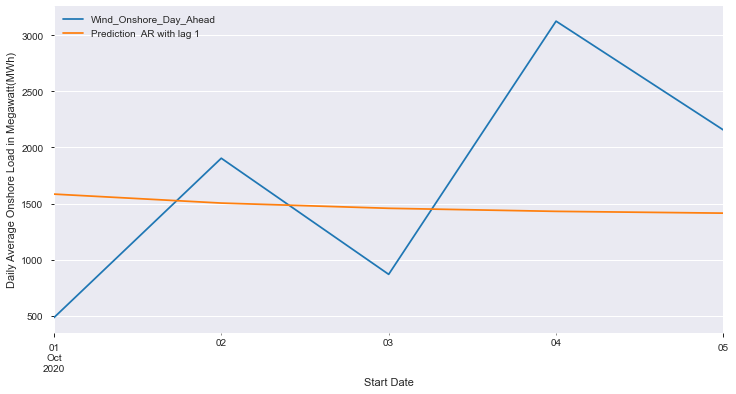

In [89]:
test_wf_ar.plot(figsize=(12,6), legend= True, label= 'Test data')
prediction_AR1.plot(legend =True, label = 'Prediction  AR with lag 1',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [90]:
# AR model with lag 1
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR1).round(2))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR1).round(2))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR1)).round(2))

Mean Absolute Error of ARIMA model : 904.89
Mean Squared Error of ARIMA model : 1027846.87
Root Mean Squared Error of ARIMA model : 1013.83


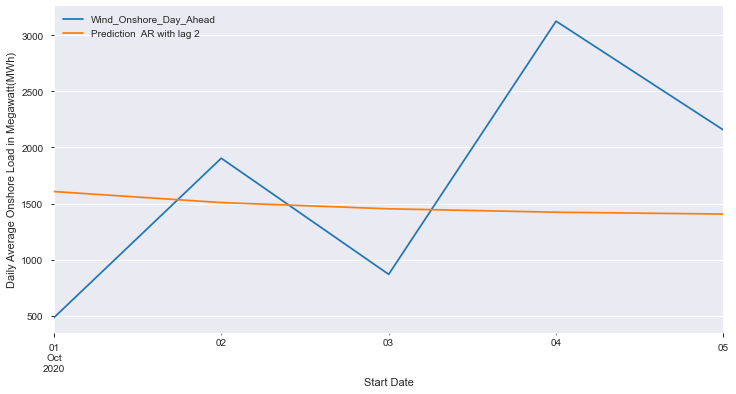

In [64]:
arima_2_model = AR(train_wf_ar['Wind_Onshore_Day_Ahead'])
arima_2_model_fit = arima_2_model.fit(maxlag=2)
prediction_AR2= arima_2_model_fit.predict(start=pred_start_date, end =pred_end_date)
test_wf_ar.plot(figsize=(12,6), legend= True)
prediction_AR2.plot(legend =True, label = 'Prediction  AR with lag 2',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [91]:
# AR model with lag 2
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR2).round(2))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR2).round(2))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR2)).round(2))

Mean Absolute Error of ARIMA model : 910.85
Mean Squared Error of ARIMA model : 1043929.39
Root Mean Squared Error of ARIMA model : 1021.73


In [66]:
ar_final_model = AR(train_wf_ar['Wind_Onshore_Day_Ahead'])
ar_final_model_fit = ar_final_model.fit()
ar_final_model_fit.params

const                         212.136617
L1.Wind_Onshore_Day_Ahead       0.546091
L2.Wind_Onshore_Day_Ahead      -0.130298
L3.Wind_Onshore_Day_Ahead       0.106623
L4.Wind_Onshore_Day_Ahead      -0.018278
L5.Wind_Onshore_Day_Ahead       0.106778
L6.Wind_Onshore_Day_Ahead       0.017765
L7.Wind_Onshore_Day_Ahead       0.002340
L8.Wind_Onshore_Day_Ahead       0.075450
L9.Wind_Onshore_Day_Ahead      -0.034393
L10.Wind_Onshore_Day_Ahead     -0.048414
L11.Wind_Onshore_Day_Ahead      0.009547
L12.Wind_Onshore_Day_Ahead      0.072783
L13.Wind_Onshore_Day_Ahead      0.020800
L14.Wind_Onshore_Day_Ahead      0.034490
L15.Wind_Onshore_Day_Ahead      0.109443
L16.Wind_Onshore_Day_Ahead     -0.071576
L17.Wind_Onshore_Day_Ahead     -0.010556
L18.Wind_Onshore_Day_Ahead      0.056429
dtype: float64

In [67]:
prediction_AR18= ar_final_model_fit.predict(start=pred_start_date, end =pred_end_date)

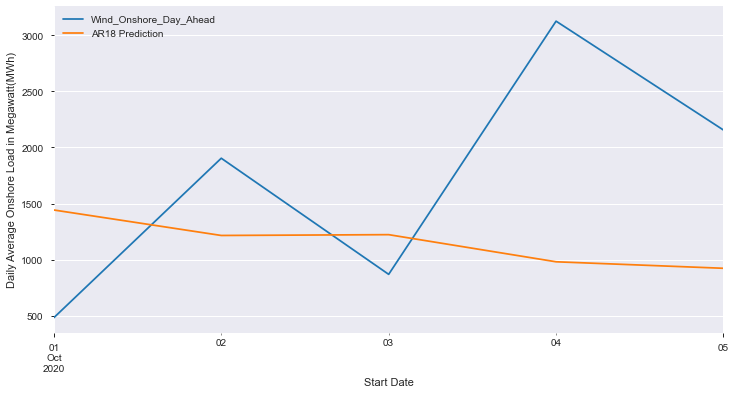

In [70]:
test_wf_ar.plot(figsize=(12,6), legend= True)
prediction_AR18.plot(legend =True, label = 'AR18 Prediction',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [92]:
# AR model with lag 18
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR18).round(2))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR18).round(2))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wf_ar['Wind_Onshore_Day_Ahead'],prediction_AR18)).round(2))

Mean Absolute Error of ARIMA model : 1075.47
Mean Squared Error of ARIMA model : 1526915.2
Root Mean Squared Error of ARIMA model : 1235.68


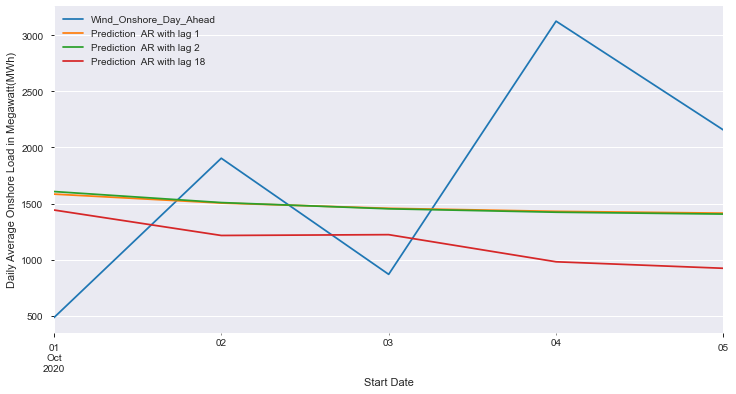

In [73]:
test_wf_ar.plot(figsize=(12,6), legend= True, label = 'Test Data')
prediction_AR1.plot(legend =True, label = 'Prediction  AR with lag 1')
prediction_AR2.plot(legend =True, label = 'Prediction  AR with lag 2')
prediction_AR18.plot(legend =True, label = 'Prediction  AR with lag 18',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [74]:
# Stationarity Test.

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
adfuller(train_wf['Wind_Onshore_Day_Ahead'])

(-2.9788727682039777,
 0.036915079451292104,
 15,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 8574.366844526405)

In [137]:
# resDiff = sm.tsa.arma_order_select_ic(train_wf['Wind_Onshore_Day_Ahead'], max_ar=7, max_ma=7, ic='aic',)
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (5, 3) is the best.


In [77]:
model = pm.auto_arima(train_wf['Wind_Onshore_Day_Ahead'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=9, max_q=7, # maximum p and q
                      ic='aic',              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9739.164, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9019.829, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9340.490, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9014.295, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8976.721, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=8966.782, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=8943.127, Time=0.10 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=8938.194, Time=0.14 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=8934.444, Time=0.15 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=8931.279, Time=0.17 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=8933.199, Time=0.18 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=8910.969, Time=0.67 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=8909.214, Time=0.50 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=8906.443, Time=0.55 sec
 ARIMA(5,0,1)(0,0,0)[0]          

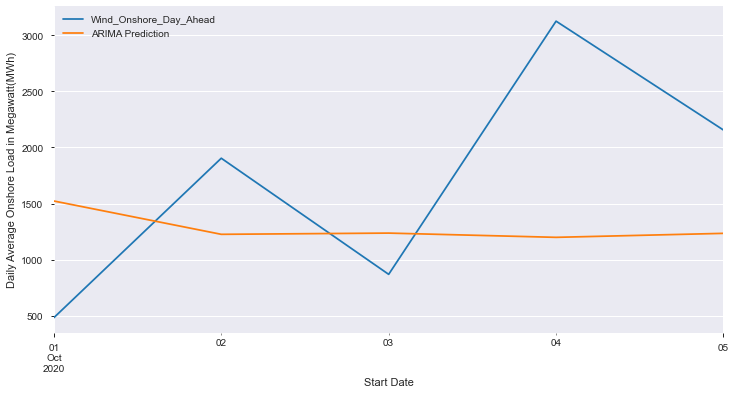

In [102]:
arima_model = ARIMA(train_wf_ar['Wind_Onshore_Day_Ahead'], order=(6,0,1), freq='D')
arima_model_fit = arima_model.fit()
prediction_arima = arima_model_fit.predict(start=pred_start_date, end =pred_end_date)
test_wf_ar.plot(figsize=(12,6), legend= True, label= 'Test data')
prediction_arima.plot(legend =True, label = 'ARIMA Prediction',xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)');

In [93]:
# ARIMA model with order of (6,0,1)
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_arima))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_arima))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_arima)))

Mean Absolute Error of ARIMA model : 986.4069205731427
Mean Squared Error of ARIMA model : 1246769.5053424805
Root Mean Squared Error of ARIMA model : 1116.5883329779515


In [80]:
auto_model = auto_arima(train_wf_ar,start_p=0,start_q=0, max_p=9, max_q=5, start_P=0, start_Q=0,m=7, seasonal= True)

In [81]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -4438.964
Date:                Wed, 02 Dec 2020   AIC                           8883.928
Time:                        00:36:37   BIC                           8896.847
Sample:                             0   HQIC                          8888.977
                                - 549                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4583      0.039    -11.635      0.000      -0.535      -0.381
ma.L2         -0.4342      0.038    -11.461      0.000      -0.508      -0.360
sigma2      6.342e+05    3.6e+04     17.635      0.000    5.64e+05    7.05e+05
===================================================================================
Ljung-Box (Q):                       44.02   Jarque-Bera (JB):                37.80
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             0.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
sarima_model = sm.tsa.statespace.SARIMAX(train_wf_ar['Wind_Onshore_Day_Ahead'],
                                order=(0,1,2),
                                seasonal_order=(0, 0, 0, 7),)
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4583      0.039    -11.635      0.000      -0.535      -0.381
ma.L2         -0.4342      0.038    -11.461      0.000      -0.508      -0.360
sigma2      6.342e+05    3.6e+04     17.635      0.000    5.64e+05    7.05e+05


In [83]:
prediction_sarima = sarima_model_fit.predict(start=pred_start_date, end =pred_end_date)

<AxesSubplot:xlabel='Start Date', ylabel='Daily Average Onshore Load in Megawatt(MWh)'>

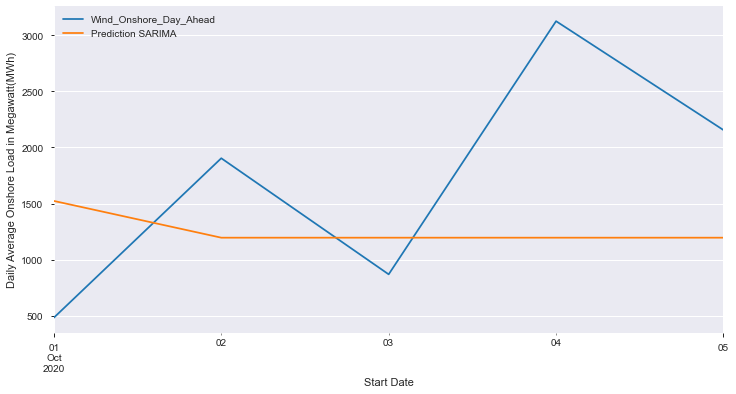

In [103]:
test_wf_ar.plot(figsize=(12,6), legend= True)
prediction_sarima.plot(legend = True ,label = 'Prediction SARIMA',
                       xlabel='Start Date', ylabel= 'Daily Average Onshore Load in Megawatt(MWh)')

In [94]:
# SARIMA model with order of (4,1,4)
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_sarima))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_sarima))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wf['Wind_Onshore_Day_Ahead'],prediction_sarima)))

Mean Absolute Error of ARIMA model : 992.678294701898
Mean Squared Error of ARIMA model : 1266535.5328821929
Root Mean Squared Error of ARIMA model : 1125.4046085218386
